In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne
import pickle
import seaborn as sns
import pandas as pd
from matplotlib import animation
from IPython.display import clear_output

In [2]:
pfis = []
for i in range(5):
    path = os.path.join('..',
                        'results',
                        'disp_epoched',
                        'eeg',
                        '1_40hz_noica_thinkall_5.5s',
                        'ldacov_featnorm', 
                        '3sess_trialnorm',
                        f'cv{i}',
                        'val_loss_PFIts.npy')

    pfi = np.load(path)
    print(pfi[0, 0])
    pfi = pfi[0, 0] - pfi[:, 2:]
    pfis.append(pfi.mean(axis=0))

pfis = np.array(pfis)

0.25333333333333335
0.2875
0.29411764705882354
0.3125
0.2777777777777778


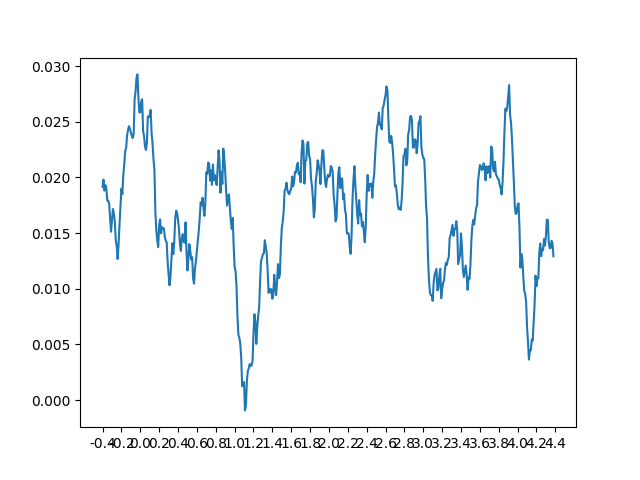

In [3]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(np.mean(pfis, axis=0))
plt.xticks(np.arange(0, 490, 20), np.arange(-400, 4401, 200)/1000)
e=0

In [ ]:
pfis = []
for i in range(1):
    path = os.path.join('..',
                        'results',
                        'disp_epoched',
                        'lukas',
                        'is40hz_lda_cov_grads',
                        f'cv{i}',
                        'trainPFI',
                        'val_loss_PFIts.npy')

    pfi = np.load(path)
    pfi = pfi[0, 0] - pfi[:, 2:]
    pfis.append(pfi)

pfi = np.mean(np.array(pfis), axis=0)

In [ ]:
path = os.path.join('..',
                    'results',
                    'disp_epoched',
                    'opm_lukas',
                    'is40hz_mark_lda_cov',
                    'cv4',
                    'val_loss_PFIts.npy')

pfi_opm = np.load(path)
pfi_opm = pfi_opm[0, 0] - pfi_opm[:, 2:]

In [ ]:
pfi.shape

In [ ]:
%matplotlib widget
fig, ax = plt.subplots()
ax.plot(np.mean(pfi, axis=0))

#ax2 = ax.twinx()
#ax2.plot(np.mean(pfi_opm, axis=0), color='r')
plt.xticks(np.arange(0, 91, 5), np.arange(-950, 950, 100)/1000)
e=0

In [ ]:
pfis = []
for i in range(1):
    path = os.path.join('..',
                            'results',
                            'disp_epoched',
                            'lukas',
                            'is40hz_lda_cov_grads',
                            f'cv{i}',
                            'trainPFI',
                            'val_loss_PFIclosest4.npy')
    pfi_ch1 = np.load(open(path, 'rb'))
    pfi_ch1 = np.mean(pfi_ch1, axis=0)
    pfi_ch1 = pfi_ch1[0, 0] - pfi_ch1[:, 1:]

    pfis.append(pfi_ch1)

pfi_ch = np.mean(np.array(pfis), axis=0)

In [ ]:
path = os.path.join('..',
                        'results',
                        'disp_epoched',
                        'opm_lukas',
                        'is40hz_mark_lda_cov',
                        'cv4',
                        'val_loss_PFIclosest1.npy')
pfi_ch1 = np.load(open(path, 'rb'))
pfi_ch1 = np.mean(pfi_ch1, axis=0)
pfi_ch1 = pfi_ch1[0, 0] - pfi_ch1[:, 1:]

In [ ]:
pfi_ch1

In [ ]:
path = os.path.join('/', 'well', 'woolrich', 'projects', 'disp_csaky', 'lukas_maxfilter', 'task_part1_lr_raw_tsss_mc.fif')
raw = mne.io.read_raw_fif(path)

In [ ]:
raw = raw.pick('meg')

In [ ]:
chn_inds = [36,31,5,167,174,28,63,177,33,19,30,140,47,45,166,130,121,168,145,131,132,200,275,176,304,272,17,279,133,149,281,165,181,46,120,15,172,249,198,32,37,6,35,151,303,147,34,27,182,150,173,38,179,129,270,274,250,199,178,170,171,16,29,280,152,141,143,305,251,146,144,65,148,7,24,175,169,273,134,271,25,138,64,26,18,3,142,122,139,4,8,180,20]

In [ ]:
chn_inds = list(range(306))[1::6]

In [ ]:
# shuffle chn_inds

np.random.shuffle(chn_inds)
print(chn_inds[:len(chn_inds)//2])

In [ ]:
# pick meg channels according to the channel indices
raw = raw.pick_channels([raw.ch_names[ind] for ind in chn_inds])

In [ ]:
len(raw.ch_names)

In [ ]:
# plot channel positions and show channel names of chn_inds
raw.plot_sensors(ch_type='grad', kind='topomap', show_names=True)

In [ ]:
chn_type = 'mag'
raw = raw.pick(chn_type)

In [ ]:
evoked_ch1 = mne.EvokedArray(pfi_ch.T, raw.info, tmin=0)

In [ ]:
%matplotlib widget
evoked_ch1.plot_topomap(times=[0], ch_type='mag', time_unit='ms', scalings=1, units='Accuracy loss', time_format='', vmin=0)

In [ ]:
path = os.path.join('/', 'well', 'woolrich', 'projects', 'disp_csaky', 'opm_lukas', 'osl_mark', 'raw_preproc.fif')
raw = mne.io.read_raw_fif(path)

In [ ]:
chn_type = [ch for ch in raw.ch_names if '[X]' in ch]
raw = raw.pick_channels(chn_type)

In [ ]:
evoked_ch1 = mne.EvokedArray(pfi_ch1.T, raw.info, tmin=0)

In [ ]:
%matplotlib widget
evoked_ch1.plot_topomap(times=[0], ch_type='eeg', time_unit='ms', scalings=1, units='Accuracy loss', time_format='', vmin=0)